In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


ModuleNotFoundError: No module named 'geopandas'

In [63]:
housing_df = pd.read_csv("melb_data.csv")

In [64]:
#housing_df['Type']
housing_df.loc[(housing_df['Type']=='h') | (housing_df['Type']=='t'),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [65]:
housing_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [66]:
housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [67]:
housing_df['Date'].unique()

array(['3/12/2016', '4/02/2016', '4/03/2017', '4/06/2016', '7/05/2016',
       '8/10/2016', '12/11/2016', '13/08/2016', '14/05/2016',
       '15/10/2016', '16/07/2016', '17/09/2016', '18/03/2017',
       '18/06/2016', '19/11/2016', '22/08/2016', '24/09/2016',
       '25/02/2017', '26/07/2016', '27/11/2016', '28/05/2016',
       '30/07/2016', '3/09/2016', '6/08/2016', '7/11/2016', '10/09/2016',
       '10/12/2016', '11/02/2017', '16/04/2016', '22/05/2016',
       '23/04/2016', '12/06/2016', '27/06/2016', '28/08/2016',
       '11/03/2017', '28/01/2016', '6/05/2017', '8/04/2017', '29/04/2017',
       '13/05/2017', '20/05/2017', '22/04/2017', '1/07/2017', '3/06/2017',
       '17/06/2017', '24/06/2017', '27/05/2017', '8/07/2017',
       '12/08/2017', '15/07/2017', '22/07/2017', '29/07/2017',
       '3/09/2017', '9/09/2017', '16/09/2017', '19/08/2017', '23/09/2017',
       '26/08/2017'], dtype=object)

In [68]:
housing_cleaned = housing_df.copy()
housing_cleaned.loc[:,'Date'] = pd.to_datetime(housing_cleaned.loc[:,'Date'], format="%d/%m/%Y")
print(housing_cleaned['Date'].min())
print(housing_cleaned['Date'].max())


2016-01-28 00:00:00
2017-09-23 00:00:00


In [69]:
housing_cleaned

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03 00:00:00,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04 00:00:00,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04 00:00:00,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04 00:00:00,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04 00:00:00,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26 00:00:00,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26 00:00:00,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26 00:00:00,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26 00:00:00,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [70]:
housing_dropped = housing_cleaned.copy()
housing_dropped = housing_dropped.drop(columns=['CouncilArea'])
housing_dropped = housing_dropped.dropna()
housing_dropped.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [71]:
numeric_cols = housing_dropped.select_dtypes(include=['float64']).columns
print(numeric_cols)
corr_matrix = housing_dropped.loc[:,numeric_cols].corr()

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [72]:
housing_dropped.loc[(housing_dropped['Type']=='h') | (housing_dropped['Type']=='t'),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04 00:00:00,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04 00:00:00,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04 00:00:00,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07 00:00:00,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08 00:00:00,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,2017-08-26 00:00:00,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,2017-08-26 00:00:00,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,Western Metropolitan,16166.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26 00:00:00,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26 00:00:00,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380.0


<Axes: xlabel='Price', ylabel='Count'>

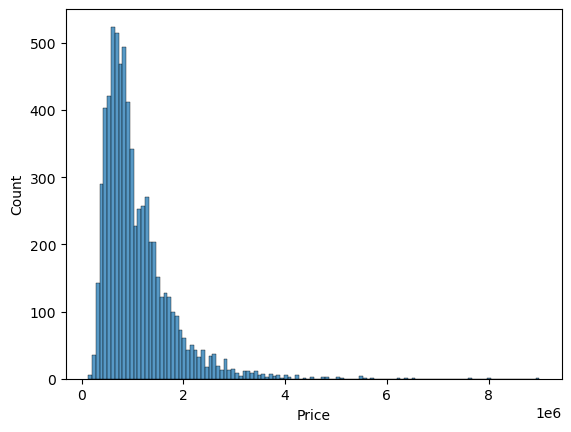

In [75]:
sns.histplot(data=housing_dropped['Price'])

In [77]:
housing_dropped.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6830.000000,6.830000e+03,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000
mean,2.978184,1.077604e+06,10.148960,3104.262225,2.951391,1.594143,1.606881,487.495461,143.446606,1964.444070,-37.808012,144.991877,7433.780527
std,0.970479,6.733202e+05,5.991423,91.208614,0.970789,0.714366,0.944613,910.805627,89.970692,37.706332,0.080042,0.104983,4352.096045
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,167.000000,93.000000,1940.000000,-37.856797,144.925522,4381.250000
50%,3.000000,8.900000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,404.000000,126.000000,1970.000000,-37.802190,144.997000,6567.000000
75%,4.000000,1.334000e+06,13.000000,3147.000000,4.000000,2.000000,2.000000,641.000000,173.000000,2000.000000,-37.756900,145.056100,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.408530,145.526350,21650.000000


In [78]:
housing_dropped['Price'].min()

131000.0

In [79]:
housing_dropped['Price'].max()

9000000.0

In [ ]:
# Combine the shapefiles